In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [2]:
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")
df

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381
2,2,ABBA,As Good As New,i'll never know why i had to go why i had to ...,1438
3,3,ABBA,Bang,making somebody happy is a question of give an...,1207
4,4,ABBA,Bang-A-Boomerang,making somebody happy is a question of give an...,1223
...,...,...,...,...,...
50827,57642,Ziggy Marley,Friend,i wanna thank you for the things you've done...,691
50828,57643,Ziggy Marley,G7,seven richest countries in the world them hav...,1443
50829,57644,Ziggy Marley,Generation,many generation have passed away fighting for...,1391
50830,57645,Ziggy Marley,Good Old Days,irie days come on play let the angels fly let...,858


In [39]:
x = TfidfVectorizer(max_features = 20000).fit_transform(df.text)
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(x)

In [40]:
pca = PCA(n_components=2)

In [41]:
X_tf = pca.fit_transform(X)

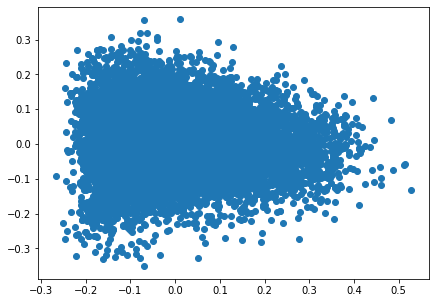

In [42]:
x = X_tf[:,0]
y = X_tf[:,1]
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o');

In [222]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.011895,-0.021061
1,-0.006979,-0.010159
2,-0.008150,-0.011102
3,-0.010742,-0.012119
4,-0.007061,-0.010230


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
df['labels'] = le.fit_transform(df.artist)

In [11]:
df

,Unnamed: 0,artist,song,text,number_of_tokens,labels
0,20468,Van Halen,Take Your Whiskey Home,well my baby she don't want me around. she ...,1197,384
1,41605,Lil Wayne,Army Gunz,yeah yeah yeah (i got army gunz) yeah yeah ...,2860,216
2,52292,Stevie Wonder,Isn't She Lovely,isn't she lovely isn't she wonderful isn't s...,580,347
3,42697,Mariah Carey,O Holy Night,o holy night the stars are brightly shining i...,408,229
4,27993,Clash,I'm So Bored With The U.S.A.,yankee soldier he want to shoot some skag he...,610,56
...,...,...,...,...,...,...
12703,25325,Billie Holiday,My Last Affair,can't you see what love and romance have done...,461,25
12704,28783,Dave Matthews Band,The Space Between,you cannot quit me so quickly is no hope in y...,1620,65
12705,18645,Squeeze,Crying In My Sleep,breaking up is breaking my heart is showing ...,894,343
12706,32684,Foo Fighters,Dear Lover,dear lover do you remember? the sound of you...,691,113


In [12]:
df[['artist']].head()

,artist
0,Van Halen
1,Lil Wayne
2,Stevie Wonder
3,Mariah Carey
4,Clash


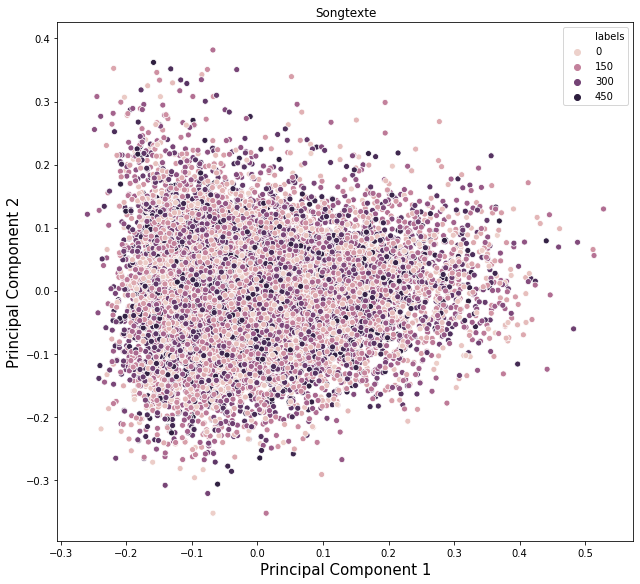

In [15]:
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=True)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue=df.labels, marker="o")
plt.title("Songtexte")

plt.show()


In [16]:
pca.explained_variance_ratio_

array([0.10703174, 0.05403782])

In [29]:
from collections import Counter
c = Counter(df.artist).most_common()[20:]

In [30]:
sample = df.copy()

In [31]:
for el in c:
    sample = sample[sample.artist != el[0]]
sample

,Unnamed: 0,artist,song,text,number_of_tokens,labels
6,47738,Paul Simon,Sure Don't Feel Like Love,i registered to vote today felt like a fool ...,1436,290
14,23085,Air Supply,Learning To Make Love To You,learning to make love to you i first felt it ...,1044,5
23,23123,Air Supply,White Christmas,i'm dreaming of a white christmas just like t...,530,5
28,34483,Grateful Dead,Eyes Of The World,right outside this lazy summer home you ain't...,958,130
30,18392,Rush,Cold Fire,it was long after midnight when we got to unc...,1061,335
...,...,...,...,...,...,...
12661,404,Alabama,Hey Baby,written by bruce channel and margaret cobb ...,825,6
12689,51488,Scorpions,The Cross,hey do you remember me i finally found the s...,1398,337
12694,6731,George Strait,Christmas Cookies,i sure do like those christmas cookies sugar ...,1648,123
12698,18430,Rush,Window To The World,i've gone flying trying to meet you you've b...,599,335


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

x = TfidfVectorizer(stop_words = None).fit_transform(sample.text)
X = TruncatedSVD(n_components=5, random_state=0).fit_transform(x)

In [33]:
pca = PCA(n_components=3)
X_tf = pca.fit_transform(X)
#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2'])

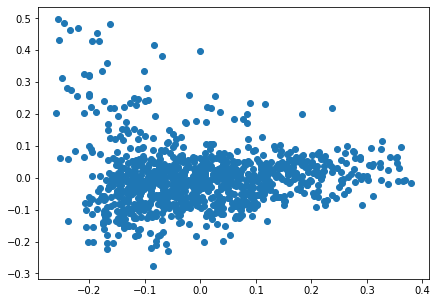

In [34]:
x = X_tf[:,0]
y = X_tf[:,1]
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o');

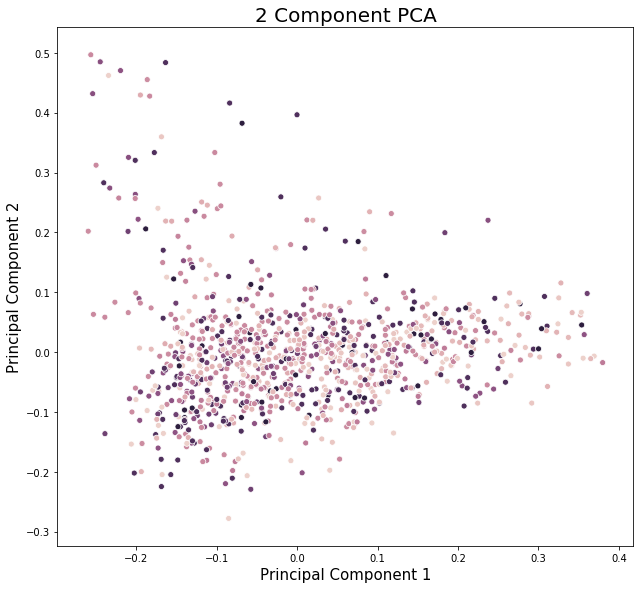

In [35]:
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=True)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue= sample['labels'], marker="o", legend=False)


plt.show()


In [36]:
pca.explained_variance_ratio_

array([0.35913242, 0.2064378 , 0.16752571])

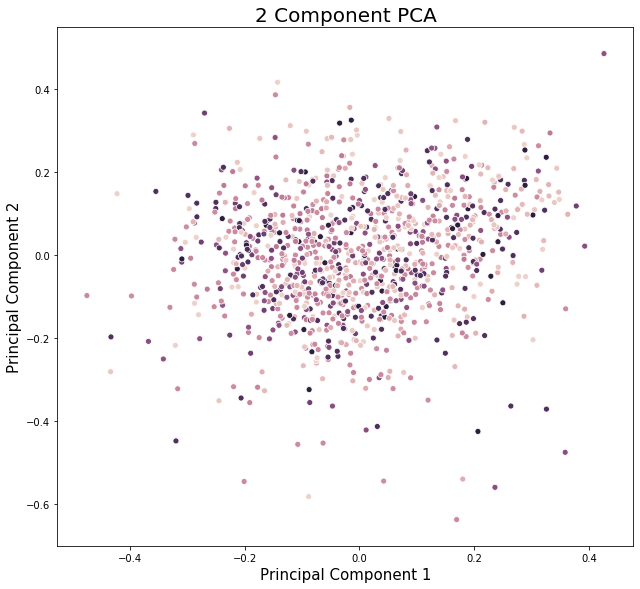

In [38]:
from sklearn import manifold
model = manifold.MDS(2, max_iter=100, n_init=1)
X_tf = model.fit_transform(X)

import numpy as np
import matplotlib.cm as cm
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=True)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue= sample['labels'], marker="o", legend=False)


plt.show()


In [74]:
df = pd.read_csv("../songs_25.csv")

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

x = TfidfVectorizer(stop_words = None).fit_transform(df.text)
X = TruncatedSVD(n_components=5, random_state=0).fit_transform(x)

In [76]:
pca = PCA(n_components=2)
X_tf = pca.fit_transform(X)

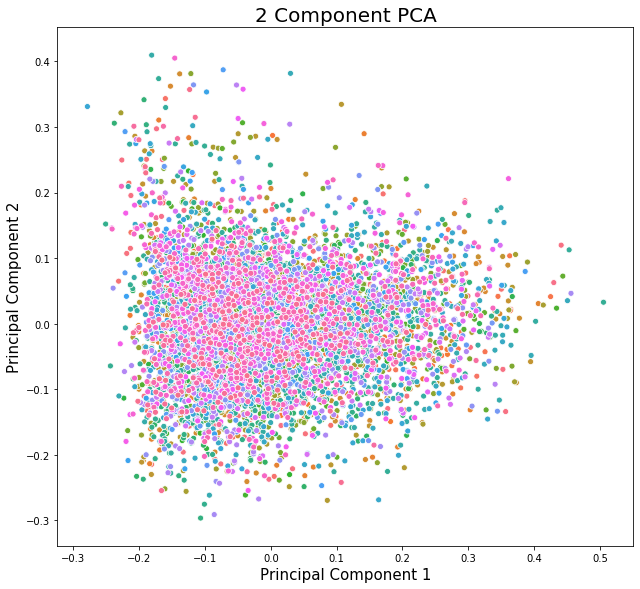

In [77]:
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=True)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue= df.artists, marker="o", legend=False)


plt.show()


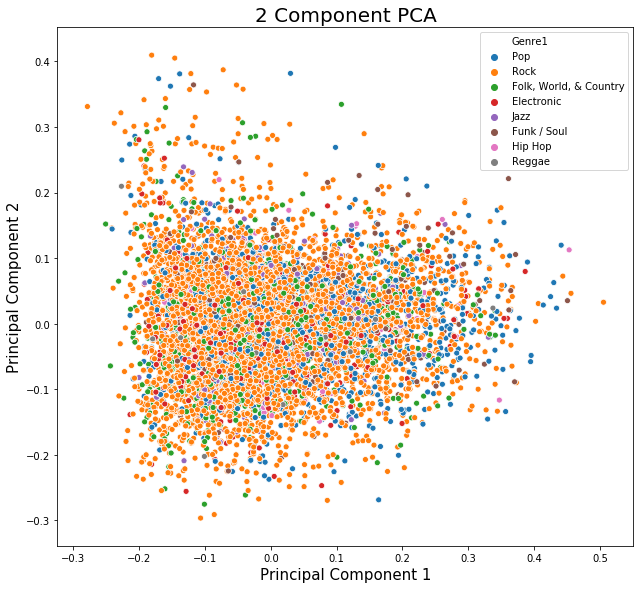

In [78]:
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=True)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue= df.Genre1, marker="o")


plt.show()


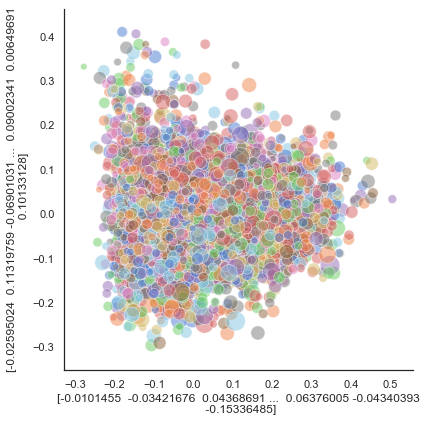

In [80]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x=X_tf[:, 0], y = X_tf[:, 1], hue="artists", size="number_of_tokens",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df,  legend=False)